In [25]:
import os
from pathlib import Path
from typing import Union
import torch
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, atan, degrees

In [26]:
def find_longest_line(plate_img_gr):
    kernel_size = 3
    blur_gray = cv.GaussianBlur(plate_img_gr, (kernel_size, kernel_size), 0)

    low_threshold = 150
    high_threshold = 200

    edges = cv.Canny(blur_gray, low_threshold, high_threshold)

    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 50  # minimum number of pixels making up a line
    max_line_gap = 5  # maximum gap in pixels between connectable line segments
    line_image = np.copy(plate_img) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    lls = []
    for indx, line in enumerate(lines):
        for x1,y1,x2,y2 in line:
            cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
            line_length = sqrt((x2-x1)**2 + (y2-y1)**2)
            lls.append((indx,line_length))
    lls.sort(key = lambda x: x[1])
    linessorted = []
    for (indx,ll) in lls:
        linessorted.append(lines[indx])
    return linessorted

def find_line_angle(line):
    x1,y1,x2,y2 = line[0]
    angle = degrees(atan(((y2-y1)/(x2-x1))))
    return angle

def rotate_image(plate_img_gr, angle):
    (h, w) = plate_img_gr.shape
    (cX, cY) = (w // 2, h // 2)
    M = cv.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated = cv.warpAffine(plate_img_gr, M, (w, h))
    return rotated

def adjust_cropping(rotated_img):
    h,w = rotated_img.shape
    targ_h = int(w/4)
    crop_h = int((h - targ_h)/2)
    cropped_rotated_img = rotated_img[crop_h:h-crop_h,:]
    return cropped_rotated_img


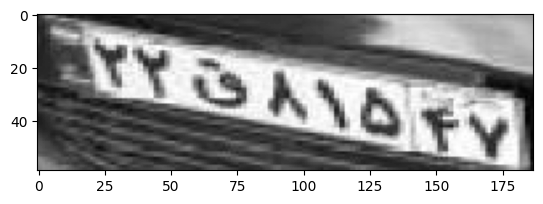

In [27]:
plates_folder = "C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Dataset/Result-Yolov7"
plate_img = cv.imread(os.path.join(plates_folder, "plate_img.png"))
plate_img_gr = cv.imread(os.path.join(plates_folder, "plate_img.png"), 0 )
plt.imshow(plate_img_gr, cmap='gray')

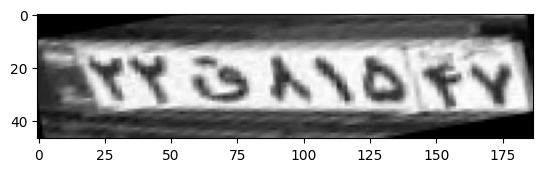

In [30]:
linessorted = find_longest_line(plate_img_gr)
rot_angle = find_line_angle(linessorted[-1])
rotated_img = rotate_image(plate_img_gr, rot_angle)
cropped_rotated_img = adjust_cropping(rotated_img)
cw = cropped_rotated_img.shape[1]

plt.imshow(cropped_rotated_img, cmap='gray')

In [31]:
cw

187